# Integration mittels Monte-Carlo-Simulation

Erweiterung von Teil 1 um eine [Monte-Carlo-Simulation](https://mathepedia.de/Monte-Carlo-Methode.html). 

### Ursprung der Monte-Carlo-Simulation
Die Monte-Carlo-Methode entstand in den 1940er-Jahren im Rahmen des Manhattan-Projekts, um mithilfe von Zufallsprozessen die Wechselwirkungen von Neutronen mit Materie theoretisch zu simulieren – insbesondere beim Durchdringen von Strahlungsabschirmungen. Der Begriff verweist auf die Glücksspielmetropole Monte Carlo, da das Verfahren wie beim Roulette auf Zufallszahlen basiert. Schon damals wurden zentrale rechnergestützte Ansätze entwickelt, die bis heute als unverzichtbare Werkzeuge in der numerischen und naturwissenschaftlichen Forschung gelten. [1]

### Anwendung Monte-Carlo-Simulation
- Numerische Lösungen von Integralen (v.a. komplexe Integrale)
- Simulation von dynamischen Prozessen (Wetter, Produktionsabläufe)
- Simulation von Gleichgewischtszuständen (neuronale Netze)
- Statische Untersuchung vn Zufallsverteilungen (erhöhte Genauigkeit der Messfehler bei Experimenten durch häufiges simulieren des Experiments)

<p>MCS wird vor allem bei komplexen Aufgaben, die eigentlich eine hohe Rechenleistung erfordern verwendet</p> [2]

### Einfaches Anwendungsbeispiel: Buffonsches Nadelexperiment
Dieses Experiment dient der Bestimmung von $\pi$. In diesem Experiment werden viele Nadeln (damals Baguettes) geworfen und anschließend gezählt wie viele Nadeln eine Linie berühren und wieviele nicht. Die Wahrscheinlichkeit, dass eine Nadel die Linie kreuzt hängt, durch den Wurf, mit der Rotationssymmetrie der Nadelorientierung von $\pi$ zusammen. 
- $p = \frac{2l}{g\pi} \Rightarrow \pi=\frac{2l}{gp} $
- g ist Abstand der Linien, l ist Länge der Nadeln
[3]

![title](img/needles.gif) [4]

#### Hit-or-Miss Methode Funktionsprinzip:
- Generierung einer geometrischen Form (meist ein Rechteck) in welchem die Funktion integriert werden soll
- Generierung von zufälligen Punkten innerhalb dieser Form
- Zählen der Punkte die innerhalb der Funktion liegen (Treffer)
- Integral durch das Verhältnis von Treffern zu allen anderen Punkten und der Fläche des Rechtecks geschätzt [5]

#### Hit-or-Miss Methode Nachteile:
- Erfordert viele zufällige Punkte um eine angemessene Genauigkeit zu erzielen [5]


#### Direkte Methode Funktionsprinzip:
- Generierung von zufälligen Punkten innerhalb des Integrationsbereichs
- Berechnung des Funktionswertes an diesen Punkten
- Schätzung des Integrals durch die Summe der Funktionswerte und der mittleren Fläche aller Punkte [5]

### Mathematische Aspekte
- direkt $$\int_{a}^b f(x)\,dx \approx\,(b-a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i)$$ $$mit\,x_i \in [a,b]\,zufällig\,gezogen$$
- hit-or-miss $$A = RA \cdot (hits/all\,points)$$

In [8]:
import numpy as np
from functions import *
# Beispiel-Funktion

f = PowerFunc("f", 1, 2)
print(f)

a, b = 0, 1  # Integrationsgrenzen
N = 100    # Anzahl der Zufallspunkte

xRandom = np.random.uniform(a, b, N)
yRandom = []
for x in xRandom:
    yRandom.append(f(x))

integralEstimate = (b - a) * np.mean(yRandom)
print(f"Monte-Carlo-Schätzwert des Integrals: {integralEstimate}")
print("Lösung durch Stammfunktion: ", f.definite_integral(a, b))

f(x)=x^2
Monte-Carlo-Schätzwert des Integrals: 0.3405969161908765
Lösung durch Stammfunktion:  0.3333333333333333


Integrierte Lösung 0.3333333333333333


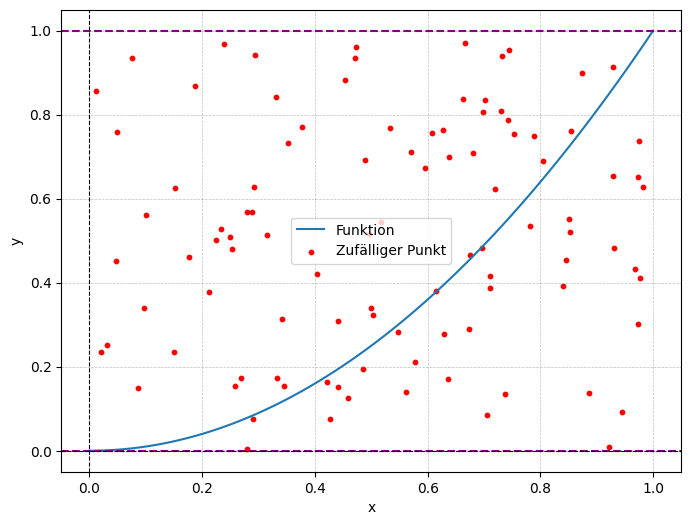

manual:  0.3400000


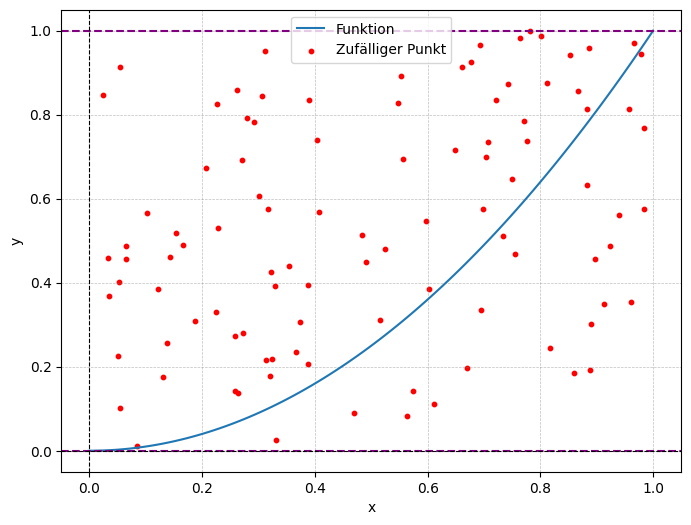

explorative:  0.2298606


Integrierte Lösung 0.0


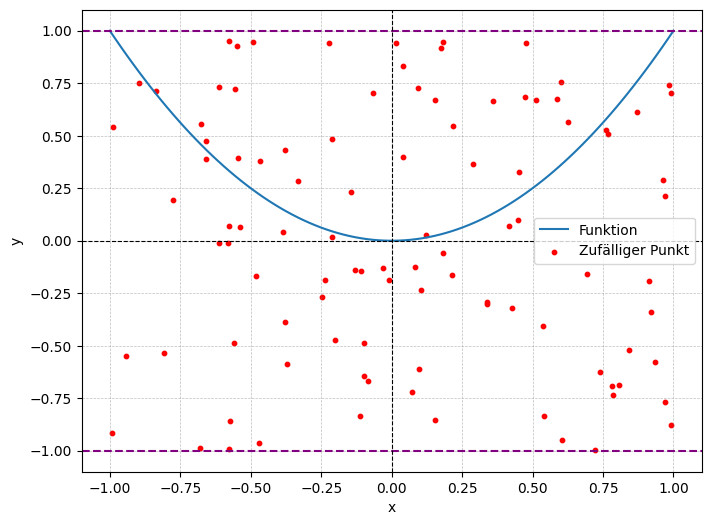

manual:  0.6800000


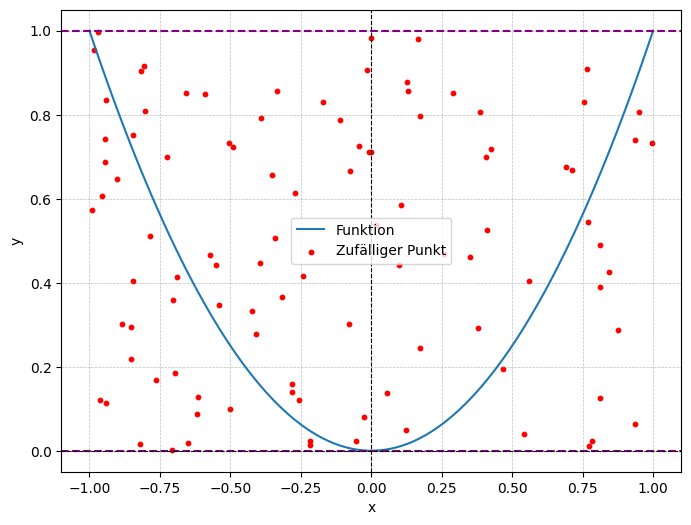

explorative:  0.7996407


Numerische Lösung 1.7247051411056717


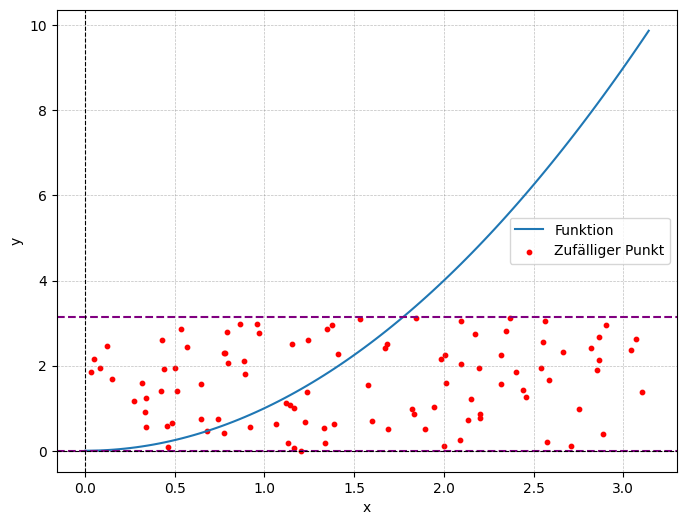

manual:  6.2178508


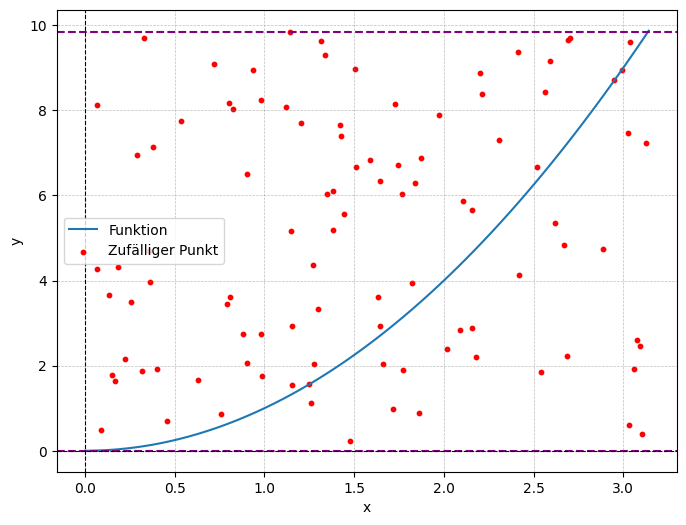

explorative:  7.4262190


Integrierte Lösung 19.085536923187664


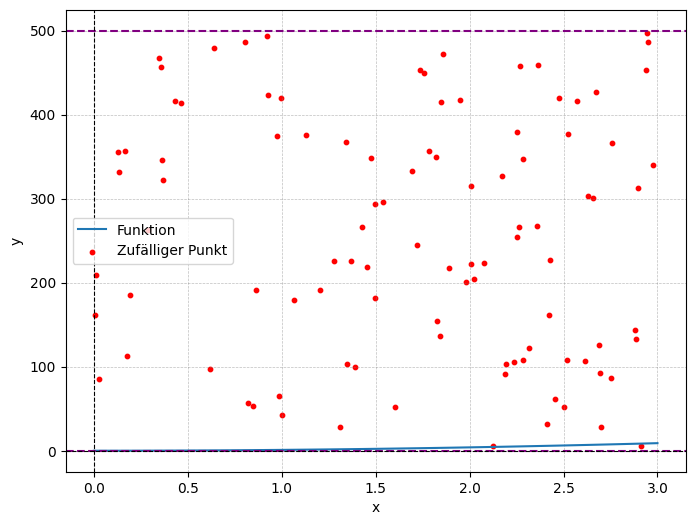

manual:  6.2178508


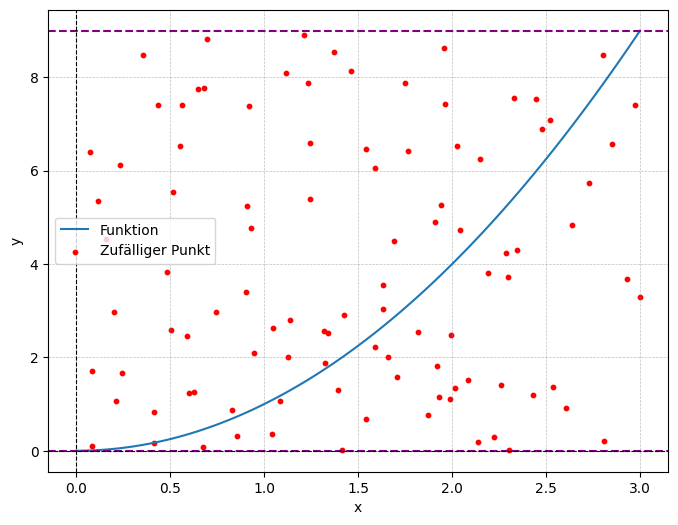

explorative:  9.9874092


In [9]:
import random
import numpy as np
from functions import *

class MCIntegration():
    def __init__(self, function):
        self.f = function

    #estimatig bounds using "random" sampling
    def estimateBounds(self, start, end, samples=1000):
        xs = [random.uniform(start, end) for _ in range(samples)]
        ys = [self.f(x) for x in xs]
        return min(ys), max(ys)

    def MCSHitOrMiss(self, start, end, numSamples=10000, fMinManual=None, fMaxManual=None):
        if start >= end:
            raise ValueError("start limit must be smaller than end limit")
        
        # defining limits of sampling-area
        if fMinManual is not None and fMaxManual is not None:
            fMin, fMax = fMinManual, fMaxManual
        else:
            fMin, fMax = self.estimateBounds(start, end)

        # defining rectangle
        rectYMin = min(0, fMin)
        rectYMax = max(0, fMax)
        rectArea = (end - start) * (rectYMax - rectYMin)

        hits = 0

        points = []

        for _ in range(numSamples):
            x = random.uniform(start, end)
            y = random.uniform(rectYMin, rectYMax)
            f_x = self.f(x)

            points.append((x, y))

            # check if dot is under/above the curve
            if f_x >= 0 and 0 <= y <= f_x:
                hits += 1
            elif f_x < 0 and f_x <= y <= 0:
                hits -= 1  # negativ unter x-Achse

        #print(np.array(points))
        self.f.plot_with_random_points(start, end, fMin, fMax, np.array(points))

        estimatedIntegral = (hits / numSamples) * rectArea
        return estimatedIntegral


sample_size = 100


f = PowerFunc("f", 1, 2)
print("Integrierte Lösung", f.definite_integral(0, 1))#f.definite_integral(0, 1))

mc = MCIntegration(f)

# manual y-limits
resultManual = mc.MCSHitOrMiss(0, 1, numSamples=sample_size, fMinManual=0, fMaxManual=1)
print(f"manual: {resultManual: .7f}")

# explorative y-limits
resultAuto = mc.MCSHitOrMiss(0, 1, numSamples=sample_size)
print(f"explorative: {resultAuto: .7f}")

print("\n")

f2 = PowerFunc("f_2", 1, 3)
print("Integrierte Lösung", f2.definite_integral(-1, 1))
mc2 = MCIntegration(f2)
resultManual2 = mc.MCSHitOrMiss(-1, 1, numSamples=sample_size, fMinManual=-1, fMaxManual=1)
print(f"manual: {resultManual2: .7f}")

resultAuto2 = mc.MCSHitOrMiss(-1,1, numSamples=sample_size)
print(f"explorative: {resultAuto2: .7f}")

print("\n")

f3 = NestedFunc("f_3", SinFunc(), PowerFunc(exponent=-1))#math.sin(1/x)
print("Numerische Lösung", f3.trapezregel(0, math.pi))
mc3 = MCIntegration(f3)
resultManual3 = mc.MCSHitOrMiss(0, math.pi, numSamples=sample_size, fMinManual=0, fMaxManual=math.pi)
print(f"manual: {resultManual3: .7f}")

resultAuto3 = mc.MCSHitOrMiss(0, math.pi, numSamples=sample_size)
print(f"explorative: {resultAuto3: .7f}")

print("\n")

f4 = ExpFunc("f_4") #math.e**x
print("Integrierte Lösung", f4.definite_integral(0, 3))
mc4 = MCIntegration(f4)

resultManual4 = mc.MCSHitOrMiss(0, 3, numSamples=sample_size, fMinManual=0, fMaxManual=500)
print(f"manual: {resultManual3: .7f}")

resultAuto4 = mc.MCSHitOrMiss(0, 3, numSamples=sample_size)
print(f"explorative: {resultAuto4: .7f}")


# Quellen
<p><a href="https://homepage.univie.ac.at/franz.vesely/oslo_2005/neum_karch_web/sc/sim/sim.pdf">[1] https://homepage.univie.ac.at/franz.vesely/oslo_2005/neum_karch_web/sc/sim/sim.pdf </a>(p. 1, entnommen am 10.07)</p>
<p><a href="https://www.zeuthen.desy.de/~kolanosk/smd_ss08/skripte/mc.pdf">[2] https://www.zeuthen.desy.de/~kolanosk/smd_ss08/skripte/mc.pdf </a>(p. 1, entnommen am 10.07)</p>
<p><a href="https://imsc.uni-graz.at/baur/lehre/WS2013-Seminar/S15.pdf">[3] https://imsc.uni-graz.at/baur/lehre/WS2013-Seminar/S15.pdf </a>(p. 6, entnommen am 10.07)</p>
<p><a href="https://faculty.uml.edu/klevasseur/courses/m419/proj/buffon/buffon.html">[4] https://faculty.uml.edu/klevasseur/courses/m419/proj/buffon/buffon.html </a>(entnommen am 10.07)</p>
<p><a href="https://www.mathematik.tu-clausthal.de/interaktiv/integration/monte-carlo-integration">[5] https://www.mathematik.tu-clausthal.de/interaktiv/integration/monte-carlo-integration </a>(entnommen am 10.07)</p>
